### In this notebook one applies homeostasis regulation rule on Lagorce et al. 2017 methods

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/laurentperrinet/quantic/science/HomeHots/HOTS_clone_laurent/HOTS


In [2]:
import os
import pickle
from Network import network

# Test of homeostasis rule on Lagorce 2017 results

In [3]:
homhots = network(algo='lagorce', krnlinit='first', tau=20, homeo=True)
homhots.learninglagorce(diginit=True)

100%|██████████| 297828/297828 [04:09<00:00, 1195.73it/s]


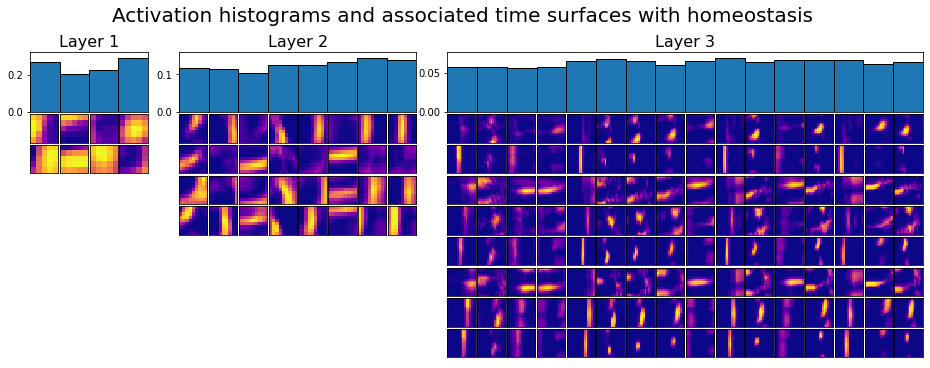

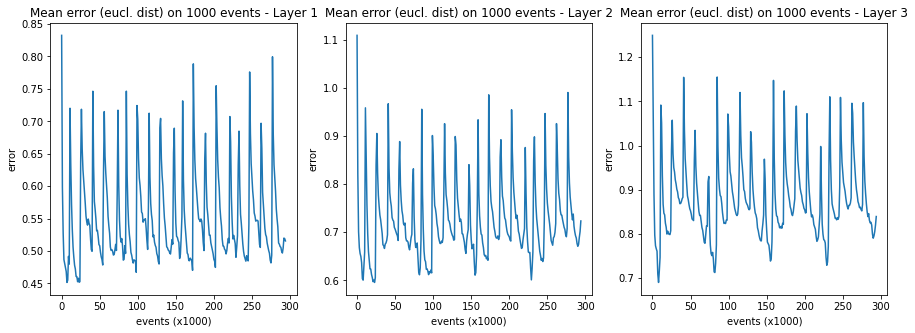

In [4]:
homhots.plotlayer()
homhots.plotconv()

In [5]:
trainmap = homhots.traininglagorce()

100%|██████████| 520844/520844 [06:33<00:00, 1323.36it/s]


In [6]:
testmap = homhots.testinglagorce(trainmap)

100%|██████████| 558235/558235 [07:02<00:00, 1322.58it/s]


bhatta:2.5% - eucli:2.5% - norm:2.5%


In [7]:
fname = "../Records/EXP_01_LagorceKmeans/2020-12-01-hots_homeo.pkl"
with open(fname, 'wb') as file:
    pickle.dump([homhots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)

# Random initialisation

100%|██████████| 297828/297828 [04:07<00:00, 1203.30it/s]


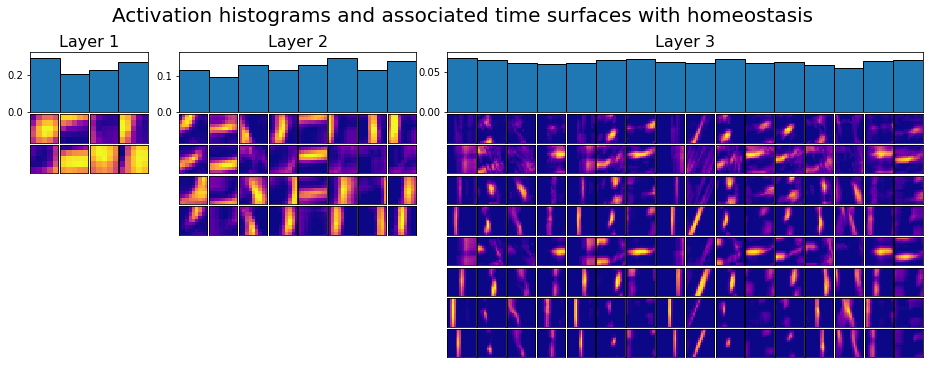

100%|██████████| 558235/558235 [05:45<00:00, 1615.96it/s]


bhatta:2.5% - eucli:2.5% - norm:2.5%


In [8]:
fname = "../Records/EXP_01_LagorceKmeans/2020-12-01-hots_homeo_randominit.pkl"
if not os.path.isfile(fname):
    homhotsrdn = network(algo='lagorce', krnlinit='rdn', tau=20, homeo=True)
    homhotsrdn.learninglagorce()
    homhotsrdn.plotlayer()
    trainmaprdnhom = homhotsrdn.traininglagorce()
    testmaprdnhom = homhotsrdn.testinglagorce(trainmaprdnhom)
    with open(fname, 'wb') as file:
        pickle.dump([homhotsrdn, trainmaprdnhom, testmaprdnhom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        homhotsrdn, trainmaprdnhom, testmaprdnhom = pickle.load(file)
homhotsrdn.plotlayer()